In [1]:
### Evaluating Value Sets

## Distribution 1D - how symmetrical/normal are they?
## Distribution 2D - how correlated are they? Not just on average but across the 2d compass!

## Do they behave like the balance versions in besf2f? E.g. regression coefficients

## What do you want these value sets *for*?
    # predicting voting *behaviour*? or voting preferences (like/ptv?)





In [2]:
################ different sets

# different waves on BES/all the waves

# previously create omni-wave sets

# BESf2f/BSA sets

In [3]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel"
#|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (10365, 13)


NameError: name 'BES_reduced_with_na' is not defined

In [4]:
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [5]:
value_wt = dict()

value_wt[1] = "W1_W5"
value_wt[2] = "W1_W5"
value_wt[3] = "W1_W5"
value_wt[4] = "W1_W5"
value_wt[5] = "W1_W5"
value_wt[6] = "W6"
value_wt[7] = "W7_W9"
value_wt[8] = "W7_W9"
value_wt[9] = "W7_W9"
value_wt[10] = "W10_W12"
value_wt[11] = "W10_W12"
value_wt[12] = "W10_W12"
value_wt[13] = "W13"
value_wt[14] = "W14W15"
value_wt[15] = "W14W15"
value_wt[16] = "W16"
value_wt[17] = "W17_W19"
value_wt[18] = "W17_W19"
value_wt[19] = "W17_W19"
value_wt[20] = "W20"
value_wt[21] = "W21"
value_wt[22] = "W22"
value_wt[23] = "W23"
value_wt[24] = "W24"
value_wt[25] = "W25"


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pyreadr
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

fname = "bes2017"
bes2017 = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\'+fname+".RData")[fname]

fname = "bsa2017"
bsa2017 = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\'+fname+".RData")[fname]

bes2017["edlevel"] = bes2017["edlevel"].cat.reorder_categories([ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad'])
bsa2017["edlevel"] = bsa2017["edlevel"].cat.reorder_categories([ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad'])

def get_edlevel_coeffs(df):
    # got to have edlevel, lrScale, alScale, weight
    # edlevel in these cats this order [ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad']
    
    output_df = pd.DataFrame(columns = ["lrScale","alScale"],
                             index = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
                                      'edlevel_Postgrad', 'intercept'])
    
    for scale in output_df.columns:
    
        mask = df["edlevel"].notnull() & df[scale].notnull() & df["weight"].notnull()
        X = pd.get_dummies( df[["edlevel"]][mask] ).drop("edlevel_No qualification",axis=1).astype(float)
        X = X[[ 'edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad', 'edlevel_Postgrad',  ]]
        y = df[scale][mask]

        reg = LinearRegression(fit_intercept=True).fit( X , y ,sample_weight = df["weight"][mask])
        reg.score(X, y)
        temp = pd.Series(reg.coef_,index=X.columns)
        temp.loc["intercept"] = reg.intercept_
        output_df[scale] = temp

    return output_df

besip2017 = BES_Panel[["wt_new_W14",
           "lr1W14W15","lr2W14W15","lr3W14W15","lr4W14W15","lr5W14W15",
           "al1W14W15","al2W14W15","al3W14W15","al4W14W15","al5W14W15",
           "al_scaleW14W15","lr_scaleW14W15",
           "p_edlevelW14",
          ]]

besip2017 = besip2017.rename(columns={"wt_new_W14":"weight","p_edlevelW14":"edlevel",
                         "al_scaleW14W15":"alScale","lr_scaleW14W15":"lrScale",
                         "lr1W14W15":"lr1","lr2W14W15":"lr2","lr3W14W15":"lr3","lr4W14W15":"lr4","lr5W14W15":"lr5",
                         "al1W14W15":"al1","al2W14W15":"al2","al3W14W15":"al3","al4W14W15":"al4","al5W14W15":"al5",})

replace_dict = { 'No qualifications':"No qualification", 'Below GCSE':'GCSE/equiv', 'GCSE':'GCSE/equiv', 
                 'A-level':'A-level/equiv', 'Undergraduate':'Undergrad', 'Postgrad':'Postgrad' }
besip2017["edlevel"] = besip2017["edlevel"].astype('object').replace(replace_dict).astype('category')\
     .cat.reorder_categories( ['No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad'] )

besip2017[["al1","al2","al3","al4","al5", "lr1","lr2","lr3","lr4","lr5"]]=\
    besip2017[["al1","al2","al3","al4","al5", "lr1","lr2","lr3","lr4","lr5"]]\
    .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))

besip2017["alScale"] = besip2017["alScale"].cat.codes.replace(-1,np.nan)
besip2017["lrScale"] = besip2017["lrScale"].cat.codes.replace(-1,np.nan)

besip2017 = besip2017.dropna()

In [7]:
lr_scale = pan_dataset_allr_values["Economic: Left <-> Right{gaussian-ish}"]
al_scale = pan_dataset_allr_values["Social: Liberalism <-> Conservatism{gaussian-ish}"]

In [8]:
# output_df_dict[file_stub].to_pickle(BES_small_data_files+file_stub+".zip",compression='zip')

In [95]:
acq_items = ['euroW7','euroW8','aomW7','authLongW10','sdoDomAndAntiEgalW15','ethnoW10',
 'ethnoW7','ethnoW9','empathyW20','empathyW14','zeroSumW14',
            'bes2017','bsa2017','besip2017',]

lavaan_items = [
#     "data2015_lavaan","data2017_lavaan","data2019_lavaan",
#              "data2015_al_lavaan","data2017_al_lavaan","data2019_al_lavaan",
             "data2015_al_lr_lavaan","data2017_al_lr_lavaan","data2019_al_lr_lavaan",
             "data2015_al_lr_pos_lavaan" ]

acq_items = acq_items + lavaan_items


wt_dict = {7:"wt_new_W7",8:"wt_new_W8",9:"wt_new_W9",10:"wt_new_W10",14:"wt_new_W14",15:"wt_new_W15",20:"wt_new_W20"}

results_df = pd.DataFrame(index=acq_items)

#     'Conservative': nan,
#  'Labour': nan,
#  'Liberal Democrat': nan,
nan_replace = { "Don't know": np.nan,
 'United Kingdom Independence Party (UKIP)': np.nan,
 'Scottish National Party (SNP)': np.nan,
 'I would/did not vote': np.nan,
 'Green Party': np.nan,
 'Brexit Party/Reform UK': np.nan,
 'Other': np.nan,
 'Plaid Cymru': np.nan,
 'British National Party (BNP)': np.nan,
 'Change UK- The Independent Group': np.nan,
 'An independent candidate': np.nan}

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

In [67]:
BES_Panel["ageW8"].astype(float)

id
1         60.0
2         64.0
3          NaN
4          NaN
5          NaN
          ... 
113062     NaN
113063     NaN
113064     NaN
113065     NaN
113066     NaN
Name: ageW8, Length: 111621, dtype: float64

In [65]:
BES_Panel["p_past_vote_2015__Conservative"]=BES_Panel["p_past_vote_2015"]=="Conservative"
BES_Panel.loc[BES_Panel["p_past_vote_2015"].isnull(),"p_past_vote_2015__Conservative"]=np.nan

BES_Panel["p_eurefvote__Leave"]=BES_Panel["p_eurefvote"]=='I voted to leave'
BES_Panel.loc[BES_Panel["p_eurefvote"].isnull(),"p_eurefvote__Leave"]=np.nan


In [75]:
search(BES_Panel,"ptvCon")
array([ 7.,  8., 10., 15.,  9., 20., 14.])

ptvConW1     15198
ptvConW2     15528
ptvConW3     13971
ptvConW4     15855
ptvConW5     15527
ptvConW6     15250
ptvConW7     30895
ptvConW8      8966
ptvConW9     30036
ptvConW10    30237
ptvConW11    30956
ptvConW12     8515
ptvConW13    31135
ptvConW15    30842
ptvConW16    18756
ptvConW17    34366
ptvConW18     9439
ptvConW20    31468
ptvConW21    30281
ptvConW22    28113
ptvConW23    30949
ptvConW25    30407
dtype: int64

In [84]:
acq_items

['euroW7',
 'euroW8',
 'aomW7',
 'authLongW10',
 'sdoDomAndAntiEgalW15',
 'ethnoW10',
 'ethnoW7',
 'ethnoW9',
 'empathyW20',
 'empathyW14',
 'zeroSumW14',
 'bes2017',
 'bsa2017',
 'besip2017',
 'besf2f2015_al_lr_pos_lavaan']

In [89]:
bes2017

,finalserialno,weight,lr1,lr2,lr5,lr6,lr7,lr8,al3,al4,al9,al10,al11,al12,edlevel,Interview_Date,lrScale,alScale,lrcat,alcat
0,10115.0,1.547044,1.0,2.0,2.0,1.0,3.0,3.0,0.0,3.0,4.0,3.0,0.0,2.0,No qualification,06/09/2017,1.333333,1.000000,Left,Lib
1,10119.0,0.732664,4.0,4.0,0.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,No qualification,06/09/2017,1.000000,2.666667,Left,Auth
2,10125.0,0.606640,1.0,3.0,1.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,4.0,4.0,No qualification,06/09/2017,NaN,NaN,NaN,NaN
3,10215.0,1.110471,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,No qualification,24/08/2017,1.333333,2.666667,Left,Auth
4,10216.0,0.767432,0.0,2.0,0.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,0.0,3.0,Undergrad,24/08/2017,1.000000,1.833333,Left,Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,69923.0,1.166885,1.0,3.0,3.0,2.0,3.0,1.0,2.0,4.0,3.0,2.0,4.0,3.0,GCSE/equiv,20/09/2017,1.833333,2.666667,Centre,Auth
2135,69925.0,0.505906,3.0,1.0,3.0,2.0,1.0,3.0,3.0,2.0,0.0,0.0,4.0,2.0,Undergrad,31/07/2017,2.500000,3.166667,Right,Auth
2136,70016.0,0.505906,1.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,Undergrad,19/09/2017,2.000000,2.333333,Centre,Centre
2137,70022.0,0.674271,3.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,4.0,0.0,No qualification,02/08/2017,2.333333,2.166667,Centre,Centre


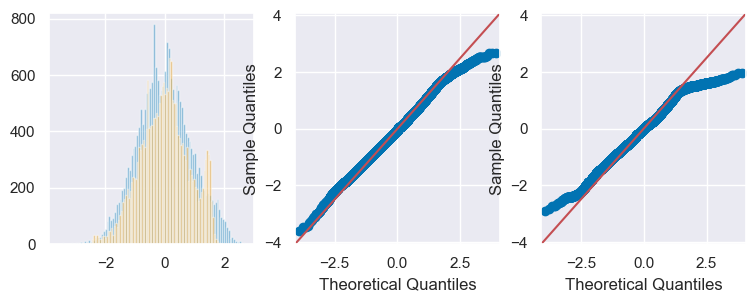

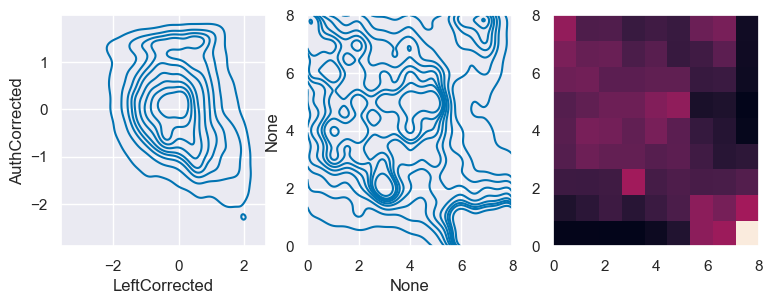

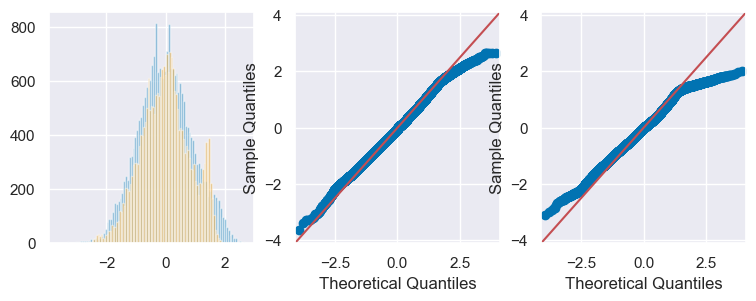

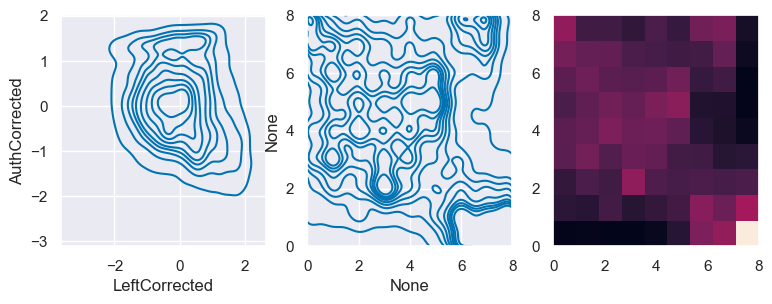

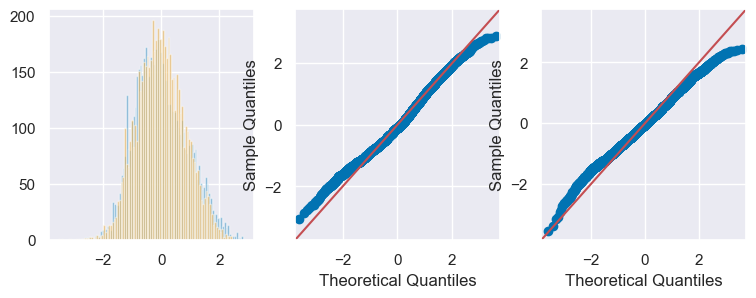

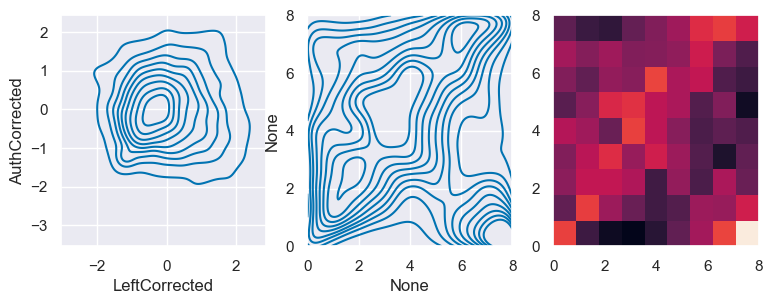

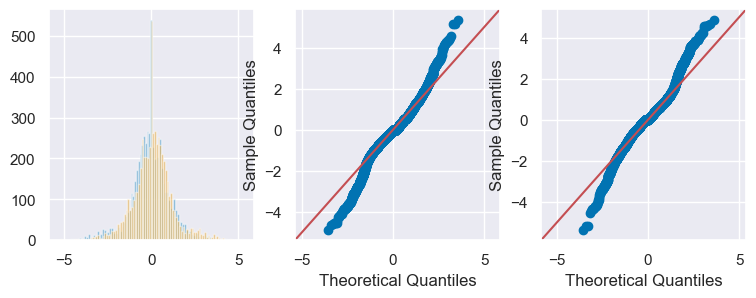

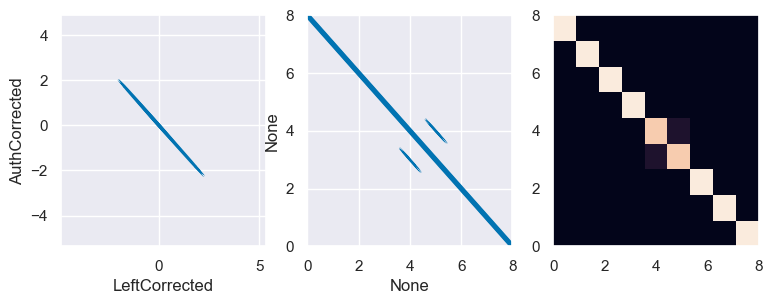

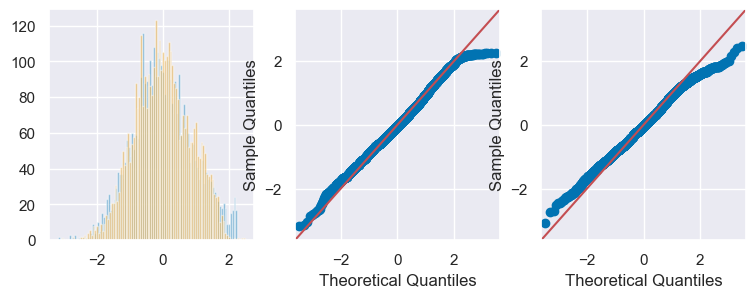

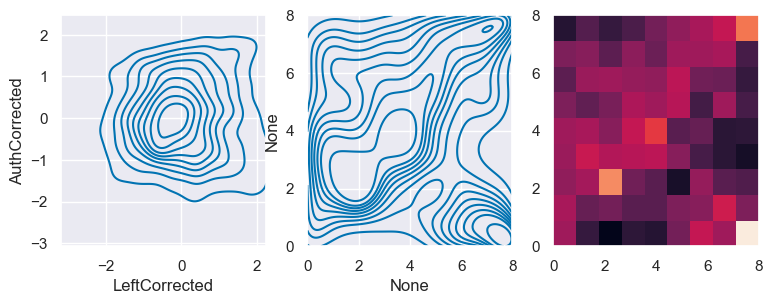

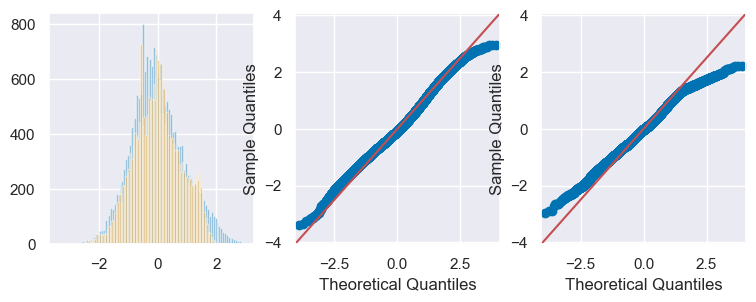

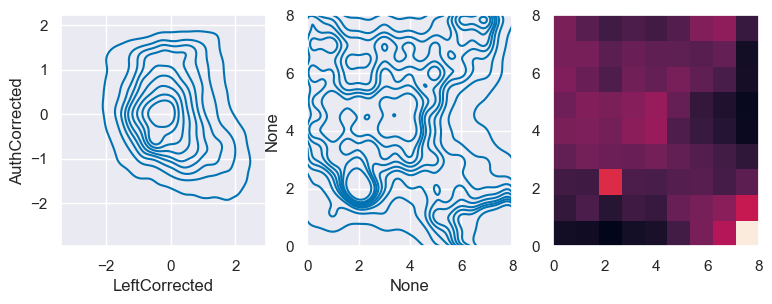

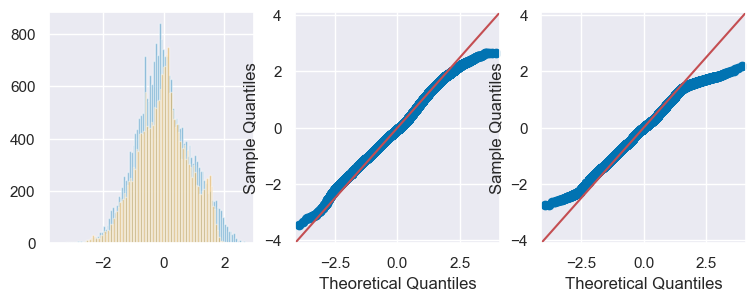

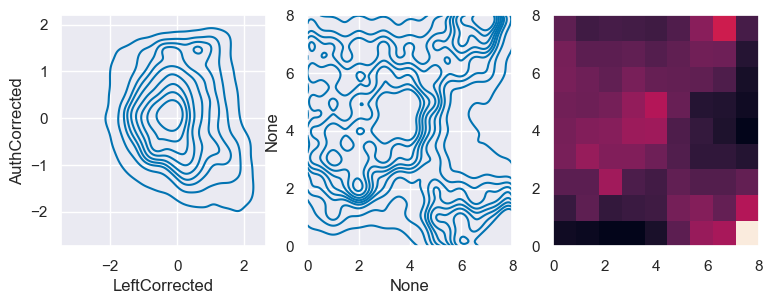

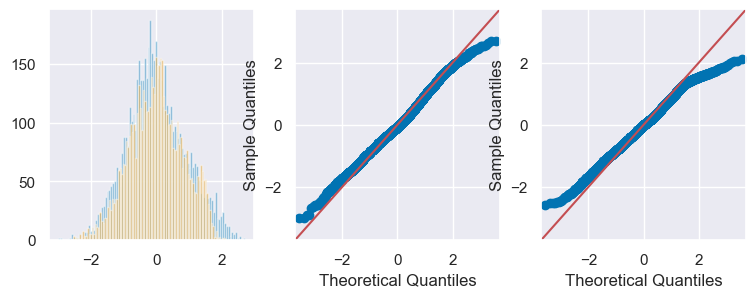

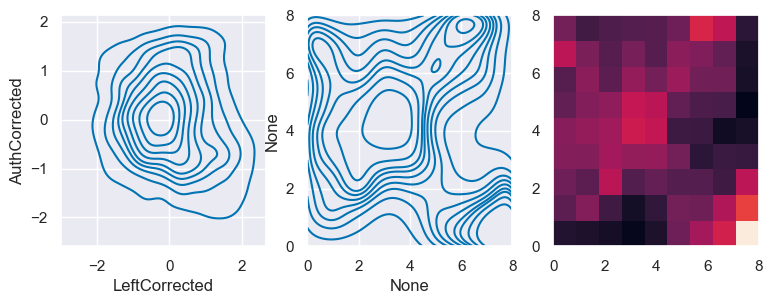

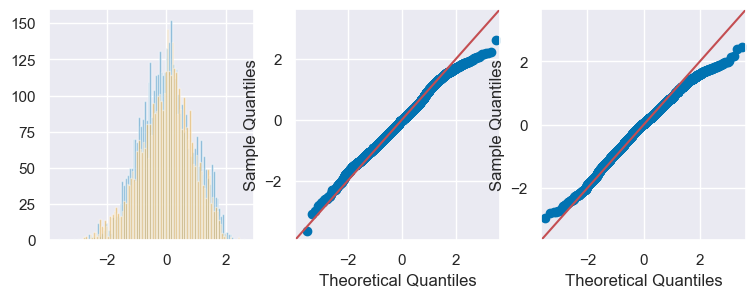

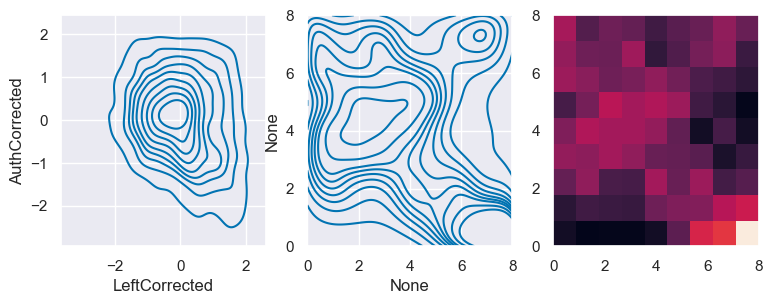

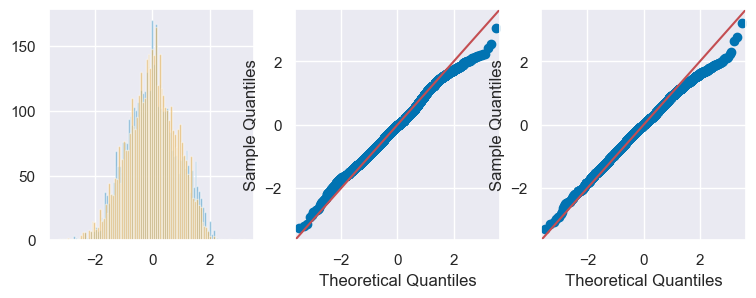

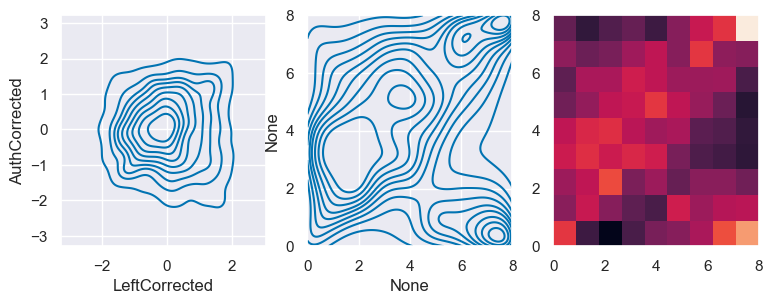

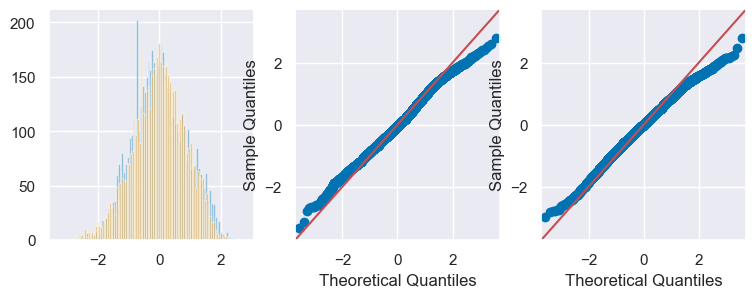

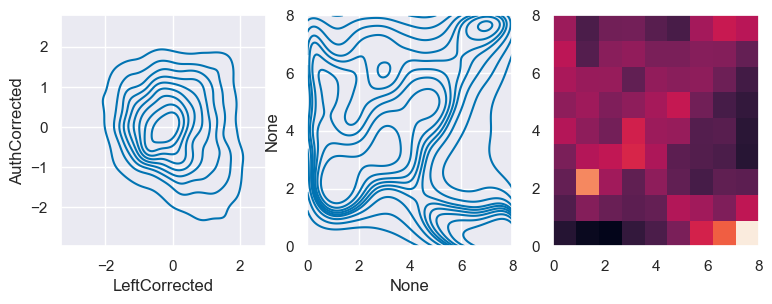

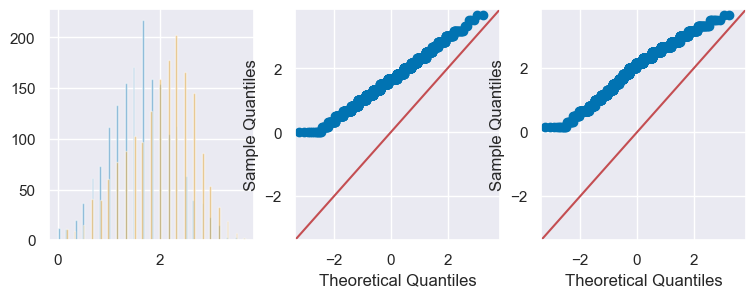

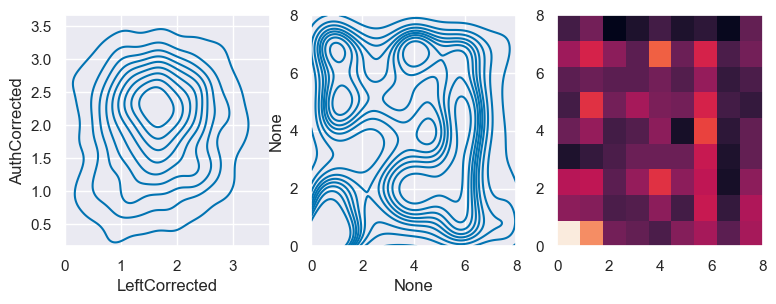

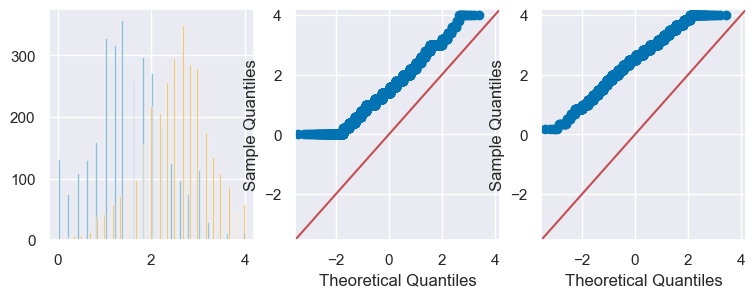

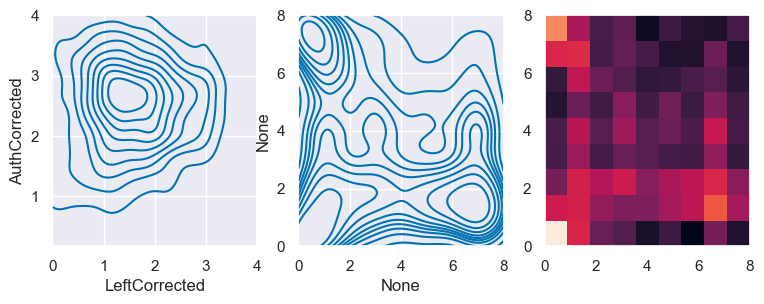

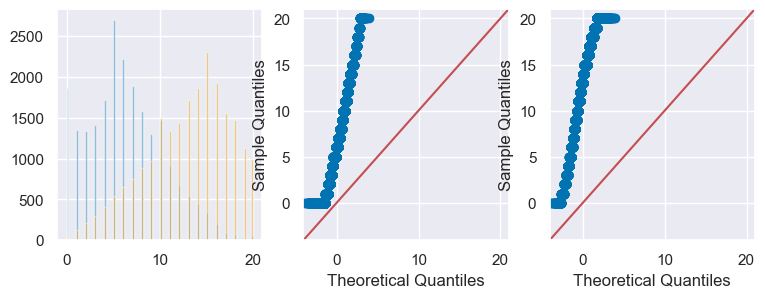

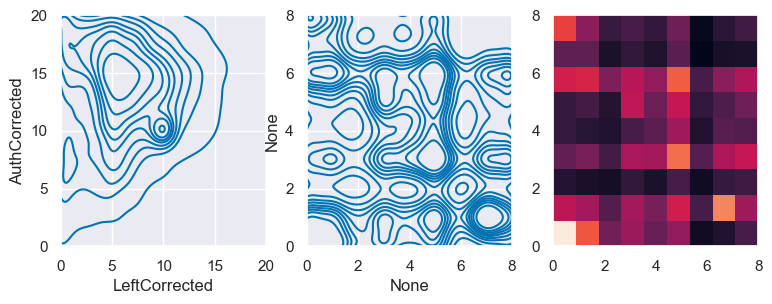

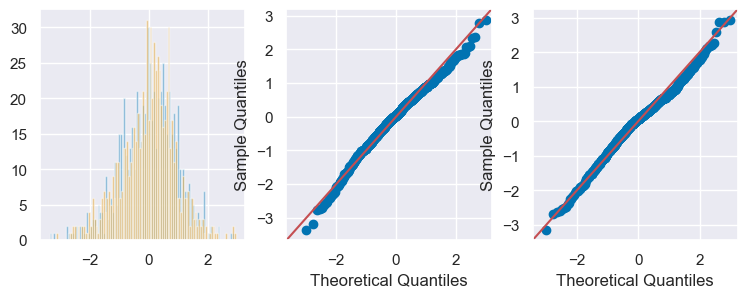

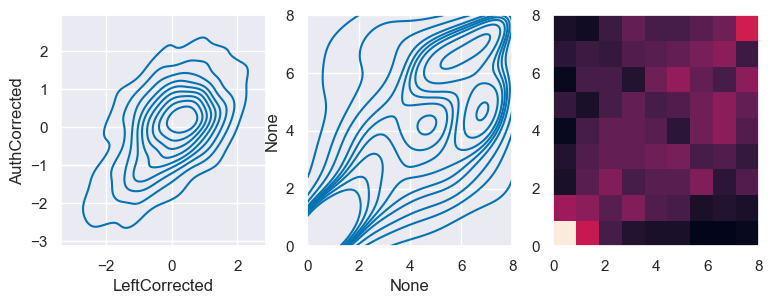

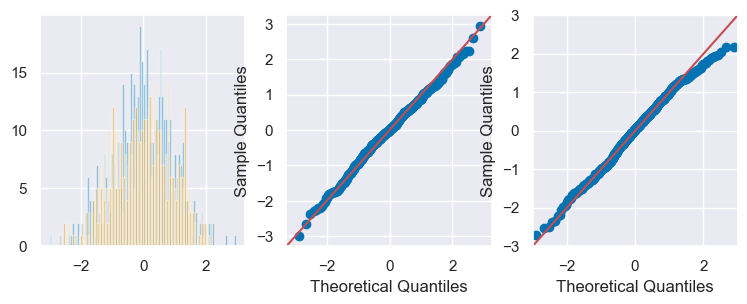

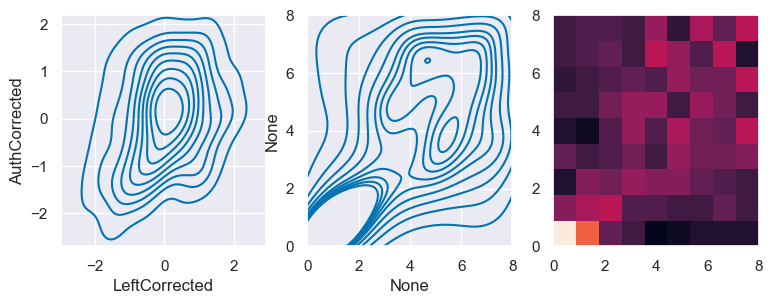

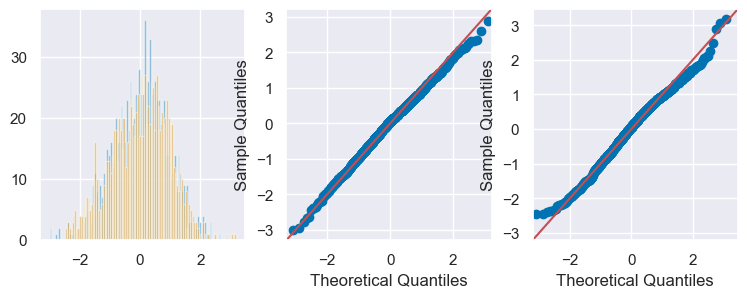

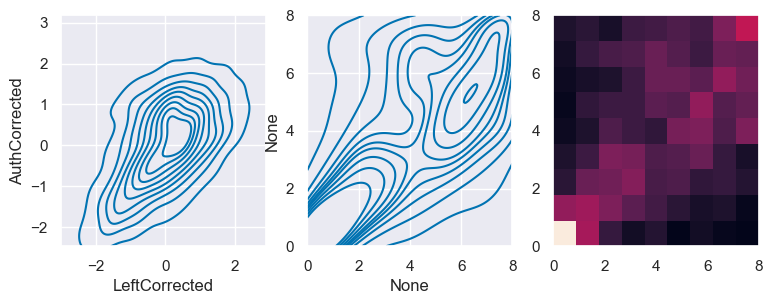

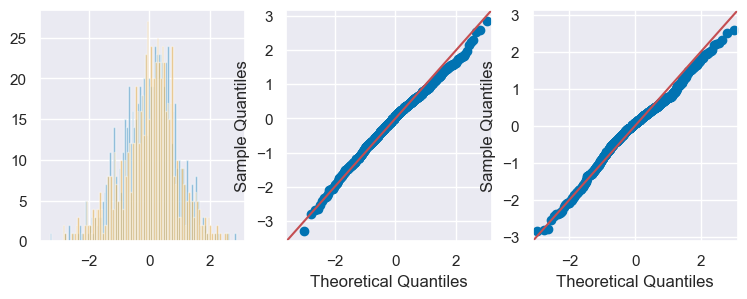

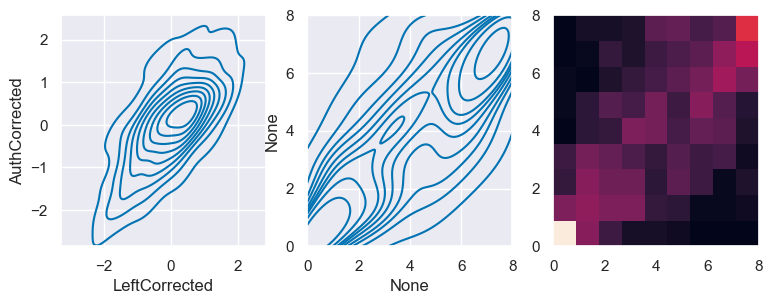

In [96]:
for value_set_name in acq_items:
    
    #in ['bes2017','bsa2017','besip2017']:
    if value_set_name == 'bes2017':
        value_set = bes2017.dropna()
        value_set["LeftCorrected"] = value_set["lrScale"]
        value_set["AuthCorrected"] = value_set["alScale"]
    elif value_set_name == 'bsa2017':
        value_set = bsa2017.dropna()
        value_set["LeftCorrected"] = value_set["lrScale"]
        value_set["AuthCorrected"] = value_set["alScale"]        
    elif value_set_name == 'besip2017':
        value_set = besip2017
        value_set["LeftCorrected"] = value_set["lrScale"]
        value_set["AuthCorrected"] = value_set["alScale"]        
        wave = 14
    elif value_set_name in lavaan_items:
        value_set = pd.read_pickle( BES_small_data_files + value_set_name + ".zip")    
        # weights?
    else:
        wave = int(value_set_name.split("W")[-1])
        value_set = pd.read_pickle( BES_small_data_files + value_set_name + ".zip")
        wt_var = wt_dict[wave]
        value_set["weight"] = BES_Panel.loc[value_set.index,wt_var]
        
    results_df.loc[value_set_name,"N"] = value_set.shape[0]
    results_df.loc[value_set_name,"wave"] = wave
    
    lr_scale = value_set["LeftCorrected"]
    al_scale = value_set["AuthCorrected"]

    value_set["lrScale"] = lr_scale
    value_set["alScale"] = al_scale
    
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    lr_scale.hist(bins=100,alpha=.5,ax=axs[0]);
    al_scale.hist(bins=100,alpha=.5,ax=axs[0]);
    sm.qqplot(lr_scale, line='45', c='r',ax=axs[1]);
    sm.qqplot(al_scale, line='45', c='g',ax=axs[2]);
    
#     results_df.loc[value_set_name,"al_kstest_res"] = stats.kstest(al_scale, stats.norm.cdf)
    results_df.loc[value_set_name,"al_kstest_stat"] = stats.kstest(al_scale, stats.norm.cdf)[0]
#     results_df.loc[value_set_name,"lr_kstest_res"] = stats.kstest(lr_scale, stats.norm.cdf)
    results_df.loc[value_set_name,"lr_kstest_stat"] = stats.kstest(lr_scale, stats.norm.cdf)[0]  
    
    q = 9
    lr_scale_uniform = pd.qcut(lr_scale,q).cat.codes
    al_scale_uniform = pd.qcut(al_scale,q).cat.codes
    
    results_df.loc[value_set_name,"lr_al_corr"] = lr_scale.corr(al_scale)
    results_df.loc[value_set_name,"lr_al_uni_corr"] = lr_scale_uniform.corr(al_scale_uniform)
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    sns.kdeplot( x=lr_scale, y=al_scale, cut=0, ax=axs[0] );
    sns.kdeplot( x=lr_scale_uniform, y=al_scale_uniform,cut=0, ax=axs[1] );
    (h) = axs[2].hist2d(lr_scale_uniform, al_scale_uniform,bins=q);
    
    results_df.loc[value_set_name,"total_deviation"] = pd.DataFrame(h[0])\
        .apply(lambda x: (x-pd.DataFrame(h[0]).stack().mean())**2).sum().sum()
    
    temp = get_edlevel_coeffs(value_set)
    for col in temp.columns:
        for row in temp.index:
            results_df.loc[value_set_name,col.split("Scale")[0]+"_"+row] = temp.loc[row,col]
    
    if (value_set_name not in ['bes2017','bsa2017']) and (value_set_name not in lavaan_items):
    
        # value_set
        variable_set = ["redistSelf","immigSelf","likeCon","ptvCon","age","p_past_vote_2015__Conservative","p_eurefvote__Leave"]

        for ind_var in variable_set:
            # 
            ind_var_wave = ind_var+"W"+str(wave)
            if ind_var_wave=="redistSelfW8":
                ind_var_wave = "redistSelfW7"
            if ind_var_wave=="redistSelfW9":
                ind_var_wave = "redistSelfW10"
            if ind_var_wave=="ptvConW14":
                ind_var_wave = "ptvConW13"                
            
            if ind_var in ["age"]:
                value_set[ind_var] = BES_Panel.loc[value_set.index,ind_var_wave].astype(float)
            elif ind_var in ["p_past_vote_2015__Conservative","p_eurefvote__Leave"]:
                value_set[ind_var] = BES_Panel.loc[value_set.index,ind_var].astype(float)
            else:
                value_set[ind_var] = BES_Panel.loc[value_set.index,ind_var_wave]\
                    .replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

            mod = smf.ols(formula=ind_var+' ~ alScale + lrScale', data=value_set)
            res = mod.fit()
    #         print(res.summary())
            results_df.loc[value_set_name,ind_var+"_reg"] = res
            results_df.loc[value_set_name,ind_var+"_rsq"] = res.rsquared_adj
            
            
        ## multinomial on VI
        vi = BES_Panel.loc[value_set.index,"generalElectionVoteW"+str(wave)]
        mask = vi.replace(nan_replace).notnull()
        
        logreg.fit(value_set[["LeftCorrected","AuthCorrected"]][mask], vi[mask])
        results_df.loc[value_set_name,"vote_int_reg"] = logreg
        results_df.loc[value_set_name,"vote_int_score"] = logreg.score(value_set[["LeftCorrected","AuthCorrected"]][mask], vi[mask])
        
            
        
lr_ed_coeffs = ['lr_edlevel_GCSE/equiv', 'lr_edlevel_A-level/equiv', 'lr_edlevel_Undergrad', 'lr_edlevel_Postgrad']
results_df["lr_ed_diff"] = results_df[lr_ed_coeffs].apply( lambda x: x - results_df.loc['bes2017',lr_ed_coeffs] , axis=1 ).applymap(lambda x: x**2).sum(axis=1)
al_ed_coeffs = ['al_edlevel_GCSE/equiv', 'al_edlevel_A-level/equiv', 'al_edlevel_Undergrad', 'al_edlevel_Postgrad']
results_df["al_ed_diff"] = results_df[al_ed_coeffs].apply( lambda x: x - results_df.loc['bes2017',al_ed_coeffs] , axis=1 ).applymap(lambda x: x**2).sum(axis=1)

In [12]:
results_df.select_dtypes('number').corr()["vote_int_score"]

N                           0.299112
wave                       -0.004802
al_kstest_stat             -0.090121
lr_kstest_stat             -0.101544
lr_al_corr                  0.664998
lr_al_uni_corr              0.705832
total_deviation            -0.670661
lr_edlevel_GCSE/equiv      -0.359532
lr_edlevel_A-level/equiv   -0.555701
lr_edlevel_Undergrad       -0.526626
lr_edlevel_Postgrad        -0.686427
lr_intercept                0.032321
al_edlevel_GCSE/equiv       0.213486
al_edlevel_A-level/equiv    0.188040
al_edlevel_Undergrad        0.127112
al_edlevel_Postgrad         0.150088
al_intercept               -0.084296
redistSelf_rsq              0.627194
immigSelf_rsq               0.672207
likeCon_rsq                 0.551411
vote_int_score              1.000000
lr_ed_diff                 -0.559978
al_ed_diff                 -0.081170
Name: vote_int_score, dtype: float64

In [13]:
results_df[["lr_ed_diff","al_ed_diff"]].mean(axis=1).sort_values()

bes2017                  0.000000
zeroSumW14               0.030017
ethnoW7                  0.036398
euroW8                   0.042345
ethnoW9                  0.048928
euroW7                   0.054207
ethnoW10                 0.055375
sdoDomAndAntiEgalW15     0.063438
empathyW14               0.072289
empathyW20               0.109096
aomW7                    0.220152
bsa2017                  0.269508
authLongW10              1.779530
besip2017               18.658101
dtype: float64

In [60]:
results_df

,N,wave,al_kstest_stat,lr_kstest_stat,lr_al_corr,lr_al_uni_corr,total_deviation,lr_edlevel_GCSE/equiv,lr_edlevel_A-level/equiv,lr_edlevel_Undergrad,...,redistSelf_reg,redistSelf_rsq,immigSelf_reg,immigSelf_rsq,likeCon_reg,likeCon_rsq,vote_int_reg,vote_int_score,lr_ed_diff,al_ed_diff
euroW7,22673.0,7.0,0.047998,0.032006,-0.274037,-0.236651,1.048088e+06,-0.071990,-0.021032,0.010315,...,<statsmodels.regression.linear_model.Regressio...,0.449909,<statsmodels.regression.linear_model.Regressio...,0.367897,<statsmodels.regression.linear_model.Regressio...,0.384227,LogisticRegression(multi_class='multinomial'),0.751280,0.072720,0.035695
euroW8,24997.0,8.0,0.047629,0.030902,-0.243716,-0.211858,1.200239e+06,-0.050683,-0.019992,0.034263,...,<statsmodels.regression.linear_model.Regressio...,0.447690,<statsmodels.regression.linear_model.Regressio...,0.354500,<statsmodels.regression.linear_model.Regressio...,0.368985,LogisticRegression(multi_class='multinomial'),0.742747,0.076199,0.008491
aomW7,6247.0,7.0,0.048926,0.050672,-0.036276,-0.008425,2.659077e+04,-0.031101,0.057451,0.133464,...,<statsmodels.regression.linear_model.Regressio...,0.326658,<statsmodels.regression.linear_model.Regressio...,0.294614,<statsmodels.regression.linear_model.Regressio...,0.377645,LogisticRegression(multi_class='multinomial'),0.727442,0.230521,0.209784
authLongW10,5948.0,10.0,0.065433,0.065464,-1.000000,-0.998613,3.360658e+06,0.182988,0.736446,0.757228,...,<statsmodels.regression.linear_model.Regressio...,0.304212,<statsmodels.regression.linear_model.Regressio...,0.291805,<statsmodels.regression.linear_model.Regressio...,0.348912,LogisticRegression(multi_class='multinomial'),0.584129,3.053342,0.505718
sdoDomAndAntiEgalW15,4017.0,15.0,0.038972,0.031091,-0.000710,0.008622,1.668356e+04,-0.035206,-0.011032,-0.053416,...,<statsmodels.regression.linear_model.Regressio...,0.366458,<statsmodels.regression.linear_model.Regressio...,0.316817,<statsmodels.regression.linear_model.Regressio...,0.347940,LogisticRegression(multi_class='multinomial'),0.700178,0.072191,0.054685
ethnoW10,21942.0,10.0,0.050307,0.044734,-0.219063,-0.184263,8.164420e+05,-0.061419,0.022964,0.032374,...,<statsmodels.regression.linear_model.Regressio...,0.347870,<statsmodels.regression.linear_model.Regressio...,0.316499,<statsmodels.regression.linear_model.Regressio...,0.415062,LogisticRegression(multi_class='multinomial'),0.690926,0.094440,0.016310
ethnoW7,24800.0,7.0,0.043390,0.044469,-0.169313,-0.132515,9.213356e+05,-0.085917,-0.084402,-0.097374,...,<statsmodels.regression.linear_model.Regressio...,0.405482,<statsmodels.regression.linear_model.Regressio...,0.367529,<statsmodels.regression.linear_model.Regressio...,0.429172,LogisticRegression(multi_class='multinomial'),0.745618,0.013828,0.058968
ethnoW9,5712.0,9.0,0.047435,0.043088,-0.166510,-0.134123,4.772422e+04,-0.093652,0.024426,-0.027196,...,<statsmodels.regression.linear_model.Regressio...,0.321011,<statsmodels.regression.linear_model.Regressio...,0.356634,<statsmodels.regression.linear_model.Regressio...,0.408032,LogisticRegression(multi_class='multinomial'),0.720075,0.058701,0.039155
empathyW20,4372.0,20.0,0.037170,0.036203,-0.204486,-0.178906,2.914195e+04,-0.066432,0.040753,-0.012235,...,<statsmodels.regression.linear_model.Regressio...,0.394153,<statsmodels.regression.linear_model.Regressio...,0.350655,<statsmodels.regression.linear_model.Regressio...,0.424181,LogisticRegression(multi_class='multinomial'),0.761513,0.061636,0.156556
empathyW14,4478.0,14.0,0.037039,0.036159,0.029524,0.035167,1.973047e+04,-0.145322,-0.157063,-0.243691,...,<statsmodels.regression.linear_model.Regressio...,0.310206,<statsmodels.regression.linear_model.Regressio...,0.309154,<statsmodels.regression.linear_model.Regressio...,0.372300,LogisticRegression(multi_class='multinomial'),0.701208,0.060895,0.083682


In [15]:
results_df[["lr_ed_diff","al_ed_diff"]]\
    .corr()
#     .drop("besip2017")
# 

,lr_ed_diff,al_ed_diff
lr_ed_diff,1.000000,0.824532
al_ed_diff,0.824532,1.000000


In [16]:
results_df[results_df.columns[4:]][["redistSelf_rsq","immigSelf_rsq","likeCon_rsq"]].corr()

,redistSelf_rsq,immigSelf_rsq,likeCon_rsq
redistSelf_rsq,1.000000,0.621600,0.210837
immigSelf_rsq,0.621600,1.000000,0.526426
likeCon_rsq,0.210837,0.526426,1.000000


In [17]:
results_df[results_df.columns[4:]][["redistSelf_rsq","immigSelf_rsq","likeCon_rsq"]]

,redistSelf_rsq,immigSelf_rsq,likeCon_rsq
euroW7,0.449909,0.367897,0.384227
euroW8,0.447690,0.354500,0.368985
aomW7,0.326658,0.294614,0.377645
authLongW10,0.304212,0.291805,0.348912
sdoDomAndAntiEgalW15,0.366458,0.316817,0.347940
ethnoW10,0.347870,0.316499,0.415062
ethnoW7,0.405482,0.367529,0.429172
ethnoW9,0.321011,0.356634,0.408032
empathyW20,0.394153,0.350655,0.424181
empathyW14,0.310206,0.309154,0.372300


In [18]:
results_df.select_dtypes('number').corr()

,N,wave,al_kstest_stat,lr_kstest_stat,lr_al_corr,lr_al_uni_corr,total_deviation,lr_edlevel_GCSE/equiv,lr_edlevel_A-level/equiv,lr_edlevel_Undergrad,...,al_edlevel_A-level/equiv,al_edlevel_Undergrad,al_edlevel_Postgrad,al_intercept,redistSelf_rsq,immigSelf_rsq,likeCon_rsq,vote_int_score,lr_ed_diff,al_ed_diff
N,1.000000,-0.549966,-0.077103,-0.082896,-0.087459,-0.052288,0.409229,0.171254,0.141377,0.170115,...,-0.315964,-0.321687,-0.315414,0.257795,0.618455,0.565859,0.263919,0.299112,0.174034,0.328196
wave,-0.549966,1.000000,0.313765,0.315349,0.286703,0.238340,-0.331814,0.176318,0.086140,0.038199,...,-0.223774,-0.209308,-0.228855,0.223213,-0.257329,-0.074318,0.004318,-0.004802,0.080954,0.172778
al_kstest_stat,-0.077103,0.313765,1.000000,0.995697,0.400899,0.291528,0.000299,0.697320,0.498833,0.549217,...,-0.537269,-0.614852,-0.603489,0.759625,-0.182807,0.211940,-0.128778,-0.090121,0.489922,0.614946
lr_kstest_stat,-0.082896,0.315349,0.995697,1.000000,0.400255,0.292186,0.005846,0.678600,0.486209,0.545297,...,-0.546119,-0.617086,-0.609556,0.763490,-0.200908,0.197991,-0.123759,-0.101544,0.495241,0.622545
lr_al_corr,-0.087459,0.286703,0.400899,0.400255,1.000000,0.992271,-0.807217,-0.024965,-0.333152,-0.311412,...,-0.069259,-0.151474,-0.137969,0.273616,0.035367,0.260483,0.210812,0.664998,-0.305200,0.220369
lr_al_uni_corr,-0.052288,0.238340,0.291528,0.292186,0.992271,1.000000,-0.838181,-0.115169,-0.413346,-0.393337,...,-0.007618,-0.084692,-0.071475,0.194385,0.072300,0.274834,0.253115,0.705832,-0.383086,0.158243
total_deviation,0.409229,-0.331814,0.000299,0.005846,-0.807217,-0.838181,1.000000,0.471492,0.683694,0.690105,...,-0.421710,-0.360678,-0.373325,0.260521,0.007465,-0.122469,-0.348496,-0.670661,0.709650,0.305576
lr_edlevel_GCSE/equiv,0.171254,0.176318,0.697320,0.678600,-0.024965,-0.115169,0.471492,1.000000,0.937053,0.937797,...,-0.869834,-0.897567,-0.885402,0.901430,-0.269372,0.030209,-0.293281,-0.359532,0.908434,0.874880
lr_edlevel_A-level/equiv,0.141377,0.086140,0.498833,0.486209,-0.333152,-0.413346,0.683694,0.937053,1.000000,0.985470,...,-0.818145,-0.809281,-0.803634,0.767252,-0.318608,-0.111011,-0.338866,-0.555701,0.970004,0.771239
lr_edlevel_Undergrad,0.170115,0.038199,0.549217,0.545297,-0.311412,-0.393337,0.690105,0.937797,0.985470,1.000000,...,-0.811516,-0.807695,-0.803260,0.788302,-0.284270,-0.103203,-0.347101,-0.526626,0.969960,0.784606


In [19]:
results_df

,N,wave,al_kstest_stat,lr_kstest_stat,lr_al_corr,lr_al_uni_corr,total_deviation,lr_edlevel_GCSE/equiv,lr_edlevel_A-level/equiv,lr_edlevel_Undergrad,...,redistSelf_reg,redistSelf_rsq,immigSelf_reg,immigSelf_rsq,likeCon_reg,likeCon_rsq,vote_int_reg,vote_int_score,lr_ed_diff,al_ed_diff
euroW7,22673.0,7.0,0.047998,0.032006,-0.274037,-0.236651,1.048088e+06,-0.071990,-0.021032,0.010315,...,<statsmodels.regression.linear_model.Regressio...,0.449909,<statsmodels.regression.linear_model.Regressio...,0.367897,<statsmodels.regression.linear_model.Regressio...,0.384227,LogisticRegression(multi_class='multinomial'),0.751280,0.072720,0.035695
euroW8,24997.0,8.0,0.047629,0.030902,-0.243716,-0.211858,1.200239e+06,-0.050683,-0.019992,0.034263,...,<statsmodels.regression.linear_model.Regressio...,0.447690,<statsmodels.regression.linear_model.Regressio...,0.354500,<statsmodels.regression.linear_model.Regressio...,0.368985,LogisticRegression(multi_class='multinomial'),0.742747,0.076199,0.008491
aomW7,6247.0,7.0,0.048926,0.050672,-0.036276,-0.008425,2.659077e+04,-0.031101,0.057451,0.133464,...,<statsmodels.regression.linear_model.Regressio...,0.326658,<statsmodels.regression.linear_model.Regressio...,0.294614,<statsmodels.regression.linear_model.Regressio...,0.377645,LogisticRegression(multi_class='multinomial'),0.727442,0.230521,0.209784
authLongW10,5948.0,10.0,0.065433,0.065464,-1.000000,-0.998613,3.360658e+06,0.182988,0.736446,0.757228,...,<statsmodels.regression.linear_model.Regressio...,0.304212,<statsmodels.regression.linear_model.Regressio...,0.291805,<statsmodels.regression.linear_model.Regressio...,0.348912,LogisticRegression(multi_class='multinomial'),0.584129,3.053342,0.505718
sdoDomAndAntiEgalW15,4017.0,15.0,0.038972,0.031091,-0.000710,0.008622,1.668356e+04,-0.035206,-0.011032,-0.053416,...,<statsmodels.regression.linear_model.Regressio...,0.366458,<statsmodels.regression.linear_model.Regressio...,0.316817,<statsmodels.regression.linear_model.Regressio...,0.347940,LogisticRegression(multi_class='multinomial'),0.700178,0.072191,0.054685
ethnoW10,21942.0,10.0,0.050307,0.044734,-0.219063,-0.184263,8.164420e+05,-0.061419,0.022964,0.032374,...,<statsmodels.regression.linear_model.Regressio...,0.347870,<statsmodels.regression.linear_model.Regressio...,0.316499,<statsmodels.regression.linear_model.Regressio...,0.415062,LogisticRegression(multi_class='multinomial'),0.690926,0.094440,0.016310
ethnoW7,24800.0,7.0,0.043390,0.044469,-0.169313,-0.132515,9.213356e+05,-0.085917,-0.084402,-0.097374,...,<statsmodels.regression.linear_model.Regressio...,0.405482,<statsmodels.regression.linear_model.Regressio...,0.367529,<statsmodels.regression.linear_model.Regressio...,0.429172,LogisticRegression(multi_class='multinomial'),0.745618,0.013828,0.058968
ethnoW9,5712.0,9.0,0.047435,0.043088,-0.166510,-0.134123,4.772422e+04,-0.093652,0.024426,-0.027196,...,<statsmodels.regression.linear_model.Regressio...,0.321011,<statsmodels.regression.linear_model.Regressio...,0.356634,<statsmodels.regression.linear_model.Regressio...,0.408032,LogisticRegression(multi_class='multinomial'),0.720075,0.058701,0.039155
empathyW20,4372.0,20.0,0.037170,0.036203,-0.204486,-0.178906,2.914195e+04,-0.066432,0.040753,-0.012235,...,<statsmodels.regression.linear_model.Regressio...,0.394153,<statsmodels.regression.linear_model.Regressio...,0.350655,<statsmodels.regression.linear_model.Regressio...,0.424181,LogisticRegression(multi_class='multinomial'),0.761513,0.061636,0.156556
empathyW14,4478.0,14.0,0.037039,0.036159,0.029524,0.035167,1.973047e+04,-0.145322,-0.157063,-0.243691,...,<statsmodels.regression.linear_model.Regressio...,0.310206,<statsmodels.regression.linear_model.Regressio...,0.309154,<statsmodels.regression.linear_model.Regressio...,0.372300,LogisticRegression(multi_class='multinomial'),0.701208,0.060895,0.083682


In [20]:
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Set training and validation sets
X, y = make_classification(n_samples=1000000, n_features=19, n_classes = 8, n_informative=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

# Solvers
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']

for sol in solvers: 
    start = time.time()
    logreg = LogisticRegression(solver=sol, multi_class='multinomial')
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

newton-cg Fit Time:  7.977004528045654
sag Fit Time:  16.375255584716797
saga Fit Time:  13.699418783187866
lbfgs Fit Time:  3.867783546447754


In [21]:
logreg.score(X,y)

0.411216

In [22]:
search(BES_Panel,"wave18|lr_scaleW17_W19|al_scaleW17_W19|p_past_vote_2019")

wave18              111619
lr_scaleW17_W19      30488
al_scaleW17_W19      29773
p_past_vote_2019     55656
dtype: int64

In [23]:
X = BES_Panel[["lr_scaleW17_W19","al_scaleW17_W19"]][BES_Panel["wave18"]==1.0].apply(lambda x: x.cat.codes.replace(-1,np.nan)).dropna()
y = BES_Panel["p_past_vote_2019"].loc[X.index].astype('object').replace(replace_dict).astype('category')

X = X[y.notnull()]
y = y[y.notnull()]


In [24]:
value_set

,weight,lr1,lr2,lr3,lr4,lr5,al1,al2,al3,al4,al5,alScale,lrScale,edlevel,LeftCorrected,AuthCorrected,redistSelf,immigSelf,likeCon
id,,,,,,,,,,,,,,,,,,,
2,0.590558,1.0,2.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,2.0,10.0,12.0,Undergrad,12.0,10.0,7.0,3.0,7.0
3,0.417970,2.0,3.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0,2.0,12.0,8.0,A-level/equiv,8.0,12.0,4.0,5.0,0.0
7,0.564297,0.0,4.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,20.0,8.0,GCSE/equiv,8.0,20.0,2.0,0.0,0.0
8,0.563310,0.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,0.0,2.0,10.0,13.0,Undergrad,13.0,10.0,8.0,3.0,8.0
18,0.872525,4.0,4.0,4.0,3.0,4.0,1.0,0.0,1.0,1.0,1.0,4.0,1.0,Postgrad,1.0,4.0,0.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75180,2.522319,3.0,4.0,2.0,2.0,2.0,4.0,4.0,4.0,3.0,3.0,18.0,7.0,Undergrad,7.0,18.0,0.0,0.0,2.0
75181,1.646019,1.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,12.0,10.0,A-level/equiv,10.0,12.0,9.0,2.0,6.0
75182,0.659872,3.0,3.0,3.0,3.0,3.0,2.0,0.0,3.0,1.0,3.0,9.0,5.0,GCSE/equiv,5.0,9.0,6.0,3.0,5.0


In [25]:
replace_dict = {"United Kingdom Independence Party (UKIP)":np.nan,"Plaid Cymru":np.nan,"An independent candidate":np.nan,
                "Don't know":np.nan,"Other":np.nan,
               "Scottish National Party (SNP)":np.nan,"Plaid Cymru":np.nan}

In [28]:
vc = BES_Panel[search(BES_Panel,"generalElectionVoteW\d+").index].stack().value_counts()

In [29]:
# nan_replace = {
# #     'Conservative': nan,
# #  'Labour': nan,
#  "Don't know": nan,
# #  'Liberal Democrat': nan,
#  'United Kingdom Independence Party (UKIP)': nan,
#  'Scottish National Party (SNP)': nan,
#  'I would/did not vote': nan,
#  'Green Party': nan,
#  'Brexit Party/Reform UK': nan,
#  'Other': nan,
#  'Plaid Cymru': nan,
#  'British National Party (BNP)': nan,
#  'Change UK- The Independent Group': nan,
#  'An independent candidate': nan}

In [30]:
y.value_counts(dropna=False)

p_past_vote_2019
Conservative                                8148
Labour                                      5097
Liberal Democrat                            2106
Scottish National Party (SNP)                659
Green Party                                  518
Brexit Party/Reform UK                       458
Other                                        220
Don't know                                   138
An independent candidate                     120
Plaid Cymru                                   99
United Kingdom Independence Party (UKIP)      12
Name: count, dtype: int64

In [31]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logreg.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [32]:
logreg.score(X,y)

0.6067140825035562

In [33]:
pd.Series( logreg.predict(X) ).value_counts()

Conservative        11145
Labour               6320
Liberal Democrat      110
Name: count, dtype: int64

In [34]:
X = BES_Panel[["lr_scaleW17_W19","al_scaleW17_W19"]][BES_Panel["wave18"]==1.0].apply(lambda x: x.cat.codes.replace(-1,np.nan)).dropna()
y = BES_Panel["generalElectionVoteW18"].loc[X.index].astype('object').replace(replace_dict).astype('category')

X = X[y.notnull()]
y = y[y.notnull()]


In [35]:
pd.Series( logreg.predict(X) ).value_counts()

Conservative        11540
Labour               6281
Liberal Democrat      117
Name: count, dtype: int64

In [36]:
## doable, toss it in - maybe with generalElectionVoteWX? or closest p_past_vote_Y?

In [37]:
## measure of deviation from normality

In [38]:


# # print("covariance = ",lr_scale_uniform.corr(al_scale_uniform))

# (h)= plt.hist2d(lr_scale_uniform,al_scale_uniform,bins=q)
# total_deviation = pd.DataFrame(h[0]).apply(lambda x: (x-pd.DataFrame(h[0]).stack().mean())**2).sum().sum()
# print("total deviation = ",total_deviation)

In [39]:
## measure of uniformity

In [40]:
# %%time
# sns.kdeplot( x=lr_scale_uniform, y=al_scale_uniform,cut=0 );

In [41]:
## some measure of deviation from uniformity

In [42]:
## Do they behave like the balance versions in besf2f? E.g. regression coefficients

## What do you want these value sets *for*?
    # predicting voting *behaviour*? or voting preferences (like/ptv?)

In [43]:
bes2017[["lrScale","alScale","edlevel"]]

,lrScale,alScale,edlevel
0,1.333333,1.000000,No qualification
1,1.000000,2.666667,No qualification
2,NaN,NaN,No qualification
3,1.333333,2.666667,No qualification
4,1.000000,1.833333,Undergrad
...,...,...,...
2134,1.833333,2.666667,GCSE/equiv
2135,2.500000,3.166667,Undergrad
2136,2.000000,2.333333,Undergrad
2137,2.333333,2.166667,No qualification


In [44]:
(bes2017["lrScale"]*6).describe()

count    1806.000000
mean        9.781285
std         3.807458
min         0.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        22.000000
Name: lrScale, dtype: float64

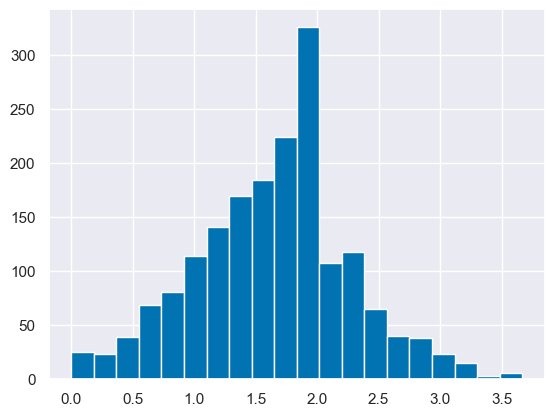

In [45]:
bes2017["lrScale"].hist(bins=20);

In [46]:
bes2017["edlevel"].value_counts()

edlevel
Undergrad           677
No qualification    583
A-level/equiv       360
GCSE/equiv          309
Postgrad            210
Name: count, dtype: int64

In [47]:
bes2017.head(5)[["lr1","lr2","lr5","lr6","lr7","lr8","al3","al4","al9","al10","al12","lrScale","alScale"]]

,lr1,lr2,lr5,lr6,lr7,lr8,al3,al4,al9,al10,al12,lrScale,alScale
0,1.0,2.0,2.0,1.0,3.0,3.0,0.0,3.0,4.0,3.0,2.0,1.333333,1.000000
1,4.0,4.0,0.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,1.000000,2.666667
2,1.0,3.0,1.0,NaN,NaN,NaN,3.0,3.0,NaN,NaN,4.0,NaN,NaN
3,0.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,1.333333,2.666667
4,0.0,2.0,0.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,1.000000,1.833333


In [48]:
bes2017["lrScale"].dropna().head(20)

0     1.333333
1     1.000000
3     1.333333
4     1.000000
6     3.166667
7     1.666667
8     1.833333
10    2.333333
11    2.166667
12    0.833333
13    1.500000
14    2.000000
15    1.333333
17    1.833333
18    1.000000
19    2.166667
20    1.833333
21    1.333333
22    1.333333
23    0.166667
Name: lrScale, dtype: float64

In [49]:
bes2017.shape

(2139, 20)

In [50]:
get_edlevel_coeffs(bes2017).round(2)

,lrScale,alScale
edlevel_GCSE/equiv,-0.10,-0.09
edlevel_A-level/equiv,-0.16,-0.28
edlevel_Undergrad,-0.03,-0.45
edlevel_Postgrad,-0.05,-0.74
intercept,1.69,2.31


In [51]:
get_edlevel_coeffs(besip2017).round(2)

,lrScale,alScale
edlevel_GCSE/equiv,0.64,-0.51
edlevel_A-level/equiv,1.04,-2.54
edlevel_Undergrad,1.12,-3.30
edlevel_Postgrad,1.05,-5.14
intercept,5.38,15.19


In [52]:
# get_edlevel_coeffs(bsa2017).round(2)

In [53]:
# get_edlevel_coeffs(value_set).round(2)

In [54]:
# get_edlevel_coeffs(besip2017).round(2)

In [55]:
# value_set
variable_set = ["redistSelfW14","immigSelfW14","likeConW14"]

for ind_var in variable_set:
    value_set[ind_var.split("W")[0]] = BES_Panel.loc[value_set.index,ind_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
    
    mod = smf.ols(formula=ind_var.split("W")[0]+' ~ alScale + lrScale', data=besip2017)
    res = mod.fit()
    print(res.summary())
#     res.rsquared_adj    

                            OLS Regression Results                            
Dep. Variable:             redistSelf   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4954.
Date:                Tue, 13 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:51:11   Log-Likelihood:                -48127.
No. Observations:               20425   AIC:                         9.626e+04
Df Residuals:                   20422   BIC:                         9.628e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0284      0.058     17.676      0.0

In [56]:
%%time
name = "lr_scale_uniform"
BES_reduced_with_na[name] = lr_scale_uniform

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type).round(2)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,"lr_scale","lr1","lr2","lr3","lr4","lr5","redistSelf"],
                                                    verbosity=0)

#        'strongly_agreeable_normed_minus_al',

NameError: name 'BES_reduced_with_na' is not defined

In [57]:
%%time
name = "al_scale_uniform"
BES_reduced_with_na[name] = al_scale_uniform

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,"al_scale","al1","al2","al3","al4","al5"],
                                                    verbosity=0)

#        'strongly_agreeable_normed_minus_al',

NameError: name 'BES_reduced_with_na' is not defined

In [58]:
###################

In [59]:
BES_reduced_with_na.shape

NameError: name 'BES_reduced_with_na' is not defined

In [ ]:
BES_reduced_with_naW26 = pd.read_pickle("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W26_only\\BES_reduced_with_na.zip",
                                       compression='zip')
BES_reduced_with_naW26.columns = [ x+"W26" for x in BES_reduced_with_naW26.columns ]

In [ ]:
BES_reduced_with_na[BES_reduced_with_naW26.columns] = BES_reduced_with_naW26

In [ ]:
BES_reduced_with_na

In [ ]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name = "generalElectionVote_Brexit Party/Reform UKW26"
# BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (REF)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like",
                                                                     "bestOn","partyId","approve","p_past_vote",
                                                                    ],
                                                    verbosity=0)

In [ ]:
search(BES_reduced_with_na,"generalElectionVote_")

In [ ]:
BES_Panel["p_edlevelW25"].value_counts()

In [ ]:
len([1,2,3,4,5,6,7, 8,9,10, 12, 15,16,17,18,19,20,21, 23, 25, 26])

In [ ]:
## [1,2,3,4,5,6,7, 8,9,10, 12, 15,16,17,18,19,20,21, 23, 25, 26]

In [ ]:
BES_reduced_with_na[search(BES_reduced_with_na,"trustMPs").index].mean()

In [ ]:
BES_file_manifest.loc[0,["Date_Start","Date_Stop"]] = ['May-24','May-24']
wave_to_date = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"]

In [ ]:
sns.lineplot(BES_reduced_with_na[search(BES_reduced_with_na,"trustMPs").index].mean())
plt.xticks(range(0,19),[wave_to_date[x] for x in [1,2,3,4, 6,7, 9,10, 12, 15,16,17,18,19,20,21, 23, 25, 26]],rotation=90);
plt.ylim([0,6]);
plt.yticks(range(7),BES_Panel["trustMPsW1"].cat.categories[:-1]);

In [ ]:
search(BES_Panel,"trustMPs")

In [ ]:
BES_Panel["trustMPsW1"].cat.categories[:-1]

In [ ]:
search(BES_Panel,"^al_scaleW14W15|^ageW14|wt_new_W14")

In [ ]:
for scale_var in ["al_scaleW14W15","lr_scaleW14W15"]:
    X = BES_Panel[[ scale_var ]].apply(lambda x: x.cat.codes.replace(-1,np.nan))
    y = BES_Panel["ageW14"].astype(float)
    wt = BES_Panel["wt_new_W14"]
    mask = X.notnull().all(axis=1) & y.notnull() & wt.notnull()

    reg = LinearRegression(fit_intercept=True).fit( X[mask],y[mask] ,sample_weight = wt[mask])
    reg.score(X[mask], y[mask])
    temp = pd.Series(reg.coef_,index=X.columns)
    temp.loc["intercept"] = reg.intercept_
    print("************")
    print(scale_var)
    print(temp)

In [ ]:
# BES_Panel[["al_scaleW14W15","lr_scaleW14W15"] ].apply(lambda x: x.cat.codes.replace(-1,np.nan))


In [ ]:
BES_Panel[ scale_var ].dtype.name